In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# For preprocessing and modeling
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

# Settings for better visualizations
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = [10, 6]

import warnings
warnings.filterwarnings("ignore")

In [4]:
import pandas as pd

In [5]:
df=pd.read_csv("E:\projects\ML_APP\student-performance-project\data\processed\initial_load.csv")


In [7]:
print(df.columns.tolist())


['school', 'sex', 'age', 'address', 'famsize', 'Parrent_status', 'Mother_edu', 'Father_edu', 'Mother_job', 'Father_job', 'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime', 'failures', 'extra_edu_supp', 'family_edu_supp', 'extra_paid_class', 'extra_curr_activities', 'nursery', 'Interested_in_higher_edu', 'internet_access', 'romantic_relationship', 'Family_quality_reln', 'freetime_after_school', 'goout_with_friends', 'workday_alcohol_consum', 'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2', 'G3']


In [7]:
# Basic information
print("Dataset Shape:", df.shape)
print("\nData Info:")
df.info()

# Check missing values
print("\nMissing Values:")
print(df.isnull().sum())

# Display basic statistics
print("\nNumerical Features Statistics:")
print(df.describe())


Dataset Shape: (395, 33)

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395 entries, 0 to 394
Data columns (total 33 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   school                    395 non-null    object
 1   sex                       395 non-null    object
 2   age                       395 non-null    int64 
 3   address                   395 non-null    object
 4   famsize                   395 non-null    object
 5   Parrent_status            395 non-null    object
 6   Mother_edu                395 non-null    int64 
 7   Father_edu                395 non-null    int64 
 8   Mother_job                395 non-null    object
 9   Father_job                395 non-null    object
 10  reason_to_chose_school    395 non-null    object
 11  guardian                  395 non-null    object
 12  traveltime                395 non-null    int64 
 13  weekly_studytime          395 non-null    i

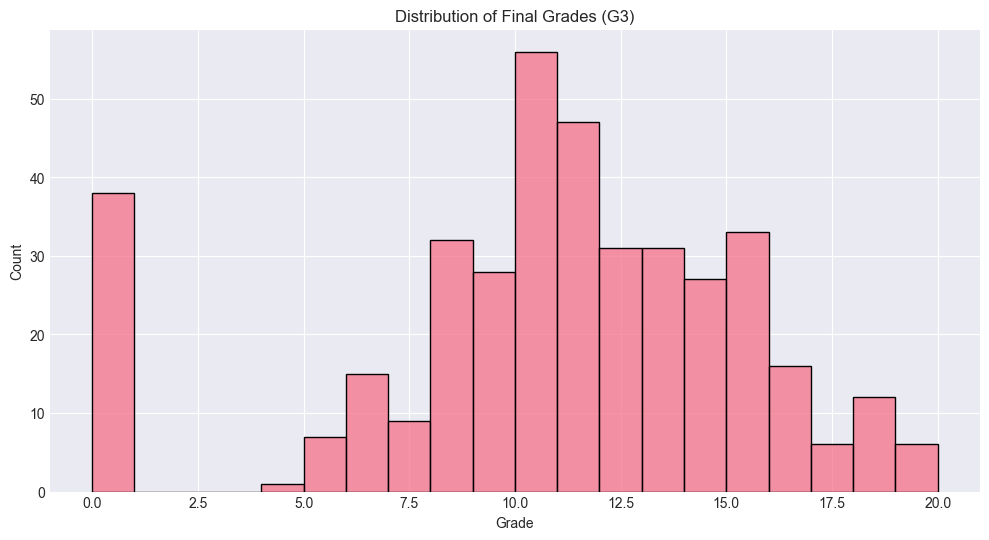

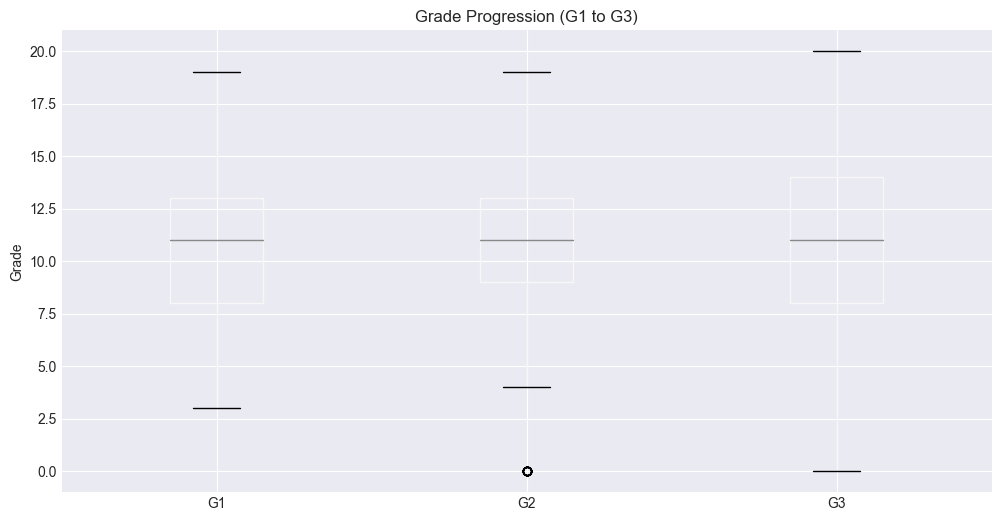

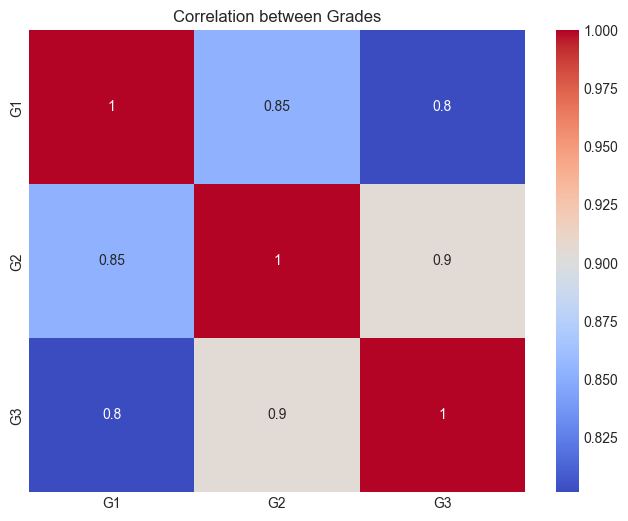

In [10]:
# Distribution of final grades
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='G3', bins=20)
plt.title('Distribution of Final Grades (G3)')
plt.xlabel('Grade')
plt.ylabel('Count')
plt.show()

# Grade progression (G1 to G3)
plt.figure(figsize=(12, 6))
df[['G1', 'G2', 'G3']].boxplot()
plt.title('Grade Progression (G1 to G3)')
plt.ylabel('Grade')
plt.show()

# Correlation between grades
plt.figure(figsize=(8, 6))
sns.heatmap(df[['G1', 'G2', 'G3']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation between Grades')
plt.show()

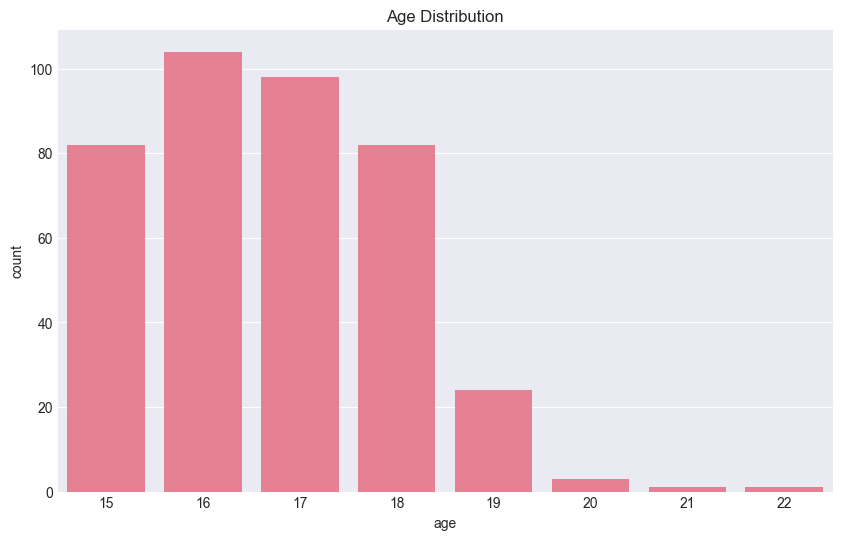

In [12]:
# Age distribution
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='age')
plt.title('Age Distribution')
plt.show()

In [11]:
# Prepare data for modeling
# Exclude G1 and G2 as mentioned in the dataset description
X = df.drop([ 'G3', 'Mother_job', 'Father_job', 'reason_to_chose_school', 'guardian', 'traveltime', 'weekly_studytime', 'failures', 'extra_edu_supp', 'famsize', 'extra_paid_class', 'extra_curr_activities', 'nursery', 'Interested_in_higher_edu', 'internet_access', 'romantic_relationship', 'Family_quality_reln', 'freetime_after_school', 'goout_with_friends', 'workday_alcohol_consum', 'weekend_alcohol_consum', 'health_status', 'absences', 'G1', 'G2'], axis=1)
y = df['G3']

# Encode categorical variables
le = LabelEncoder()
for column in X.select_dtypes(include=['object']):
    X[column] = le.fit_transform(X[column])

In [12]:
print (X.head())


   school  sex  age  address  Parrent_status  Mother_edu  Father_edu  \
0       0    0   18        1               0           4           4   
1       0    0   17        1               1           1           1   
2       0    0   15        1               1           1           1   
3       0    0   15        1               1           4           2   
4       0    0   16        1               1           3           3   

   family_edu_supp  
0                0  
1                1  
2                0  
3                1  
4                1  
